In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from transformers import T5TokenizerFast

import sys
sys.path.append("../")

from src.data.ba_ru_dataset import BaRuDataset



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data = pd.read_parquet("../data/dataset/source/train-00000-of-00001-cb5cc9a04cc776c6.parquet")

In [3]:
data.head()

,ba,ru,corpus
0,"– Өфө: Китап, 2013.","– Уфа: Китап, 2021.",https://t.me/bashkort_translate_bot
1,"— Бүре һуҡты, бабайҙы бүре һуҡты!","— Волк ударил моего старика, волк ударил!",https://t.me/bashkort_translate_bot
2,"Һикелә, мине күҙәтә-күҙәтә, батмуста борсаҡ тә...","Мама вскочила с нар, сидя на которых перебирал...",https://t.me/bashkort_translate_bot
3,"Ҡыҙҙырылған бойҙай, йәғни ҡурмас, ыуыҙ ҡоймағы...",Иногда в нашем доме пахнет курмасом из каленой...,https://t.me/bashkort_translate_bot
4,Илағым килде ҡапыл...,Мне вдруг захотелось заплакать...,https://t.me/bashkort_translate_bot


In [8]:
data.shape

(710718, 3)

In [19]:
ba_sentense_length = (data["ba"].str.count(" ") + 1).tolist()
ru_sentense_length = (data["ru"].str.count(" ") + 1).tolist()

In [25]:
ba_q95 = np.quantile(ba_sentense_length, 0.95)
ru_q95 = np.quantile(ru_sentense_length, 0.95)

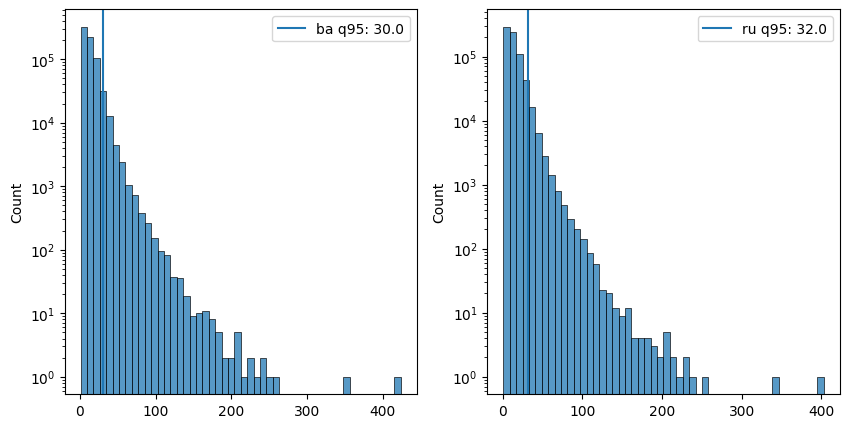

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.histplot(x=ba_sentense_length, bins=50, ax=ax[0])
sns.histplot(x=ru_sentense_length, bins=50, ax=ax[1])
ax[0].set_yscale("log")
ax[1].set_yscale("log")
ax[0].axvline(ba_q95, label=f"ba q95: {ba_q95}")
ax[1].axvline(ru_q95, label=f"ru q95: {ru_q95}")
ax[0].legend()
ax[1].legend()

In [27]:
data.iloc[10000]["ru"], data.iloc[10000]["ru"].count(" "), 

('– Анна с надеждой устремила на него задумчивые карие глаза.', 9)

In [5]:
random_state = 42
train, test = train_test_split(data, random_state=random_state, test_size=0.2)
train, val = train_test_split(train, random_state=random_state, test_size=0.1)

train.to_parquet("../data/dataset/splits/train.parquet")
val.to_parquet("../data/dataset/splits/val.parquet")
test.to_parquet("../data/dataset/splits/test.parquet")

In [8]:
dset = BaRuDataset("../data/dataset/source/train-00000-of-00001-cb5cc9a04cc776c6.parquet")

fast_tokenizer = T5TokenizerFast(vocab_file="../model.model")

sent = dset[25][1]

print(sent)
print(fast_tokenizer.tokenize(sent))

You are using the legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This means that tokens that come after special tokens will not be properly handled. We recommend you to read the related pull request available at https://github.com/huggingface/transformers/pull/24565


Конечно, Мавлида немного растяпа, говорила же, как она оплевала всю грудь...
['▁Конечно', ',', '▁Ма', 'в', 'ли', 'да', '▁немного', '▁раст', 'я', 'па', ',', '▁говорила', '▁же', ',', '▁как', '▁она', '▁о', 'пле', 'вала', '▁всю', '▁грудь', '...']


In [3]:
dset = BaRuDataset("../data/dataset/source/train-00000-of-00001-cb5cc9a04cc776c6.parquet")

fast_tokenizer = T5TokenizerFast(vocab_file="../model.model")

sent = dset[25][0]

print(sent)
print(fast_tokenizer.tokenize(sent))

Мәүлиҙә мәүешерәк инде ул, әйттем дәһә, түшенә төкөрә, тип...
['▁М', 'әү', 'ли', 'ҙә', '▁', 'мәү', 'еш', 'ерәк', '▁инде', '▁ул', ',', '▁әйтте', 'м', '▁дә', 'һә', ',', '▁түш', 'енә', '▁төк', 'өрә', ',', '▁тип', '...']
